<a href="https://colab.research.google.com/github/The19146267/Project-cuoi-ki/blob/main/Pneumonia_X_ray_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
# Define path to the data directory
data_dir = Path('/content/drive/MyDrive/Preumonia X-ray/archive/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [ ]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,/content/drive/MyDrive/Preumonia X-ray/archive...,1
1,/content/drive/MyDrive/Preumonia X-ray/archive...,1
2,/content/drive/MyDrive/Preumonia X-ray/archive...,1
3,/content/drive/MyDrive/Preumonia X-ray/archive...,0
4,/content/drive/MyDrive/Preumonia X-ray/archive...,0


In [ ]:
train_data.shape

(5216, 2)

1    3875
0    1341
Name: label, dtype: int64


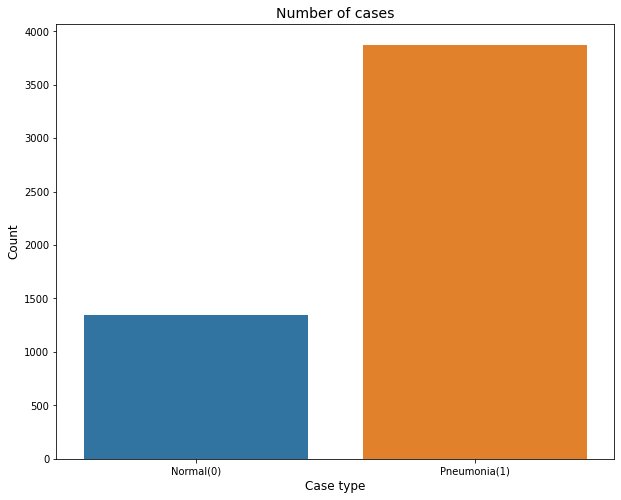

In [ ]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

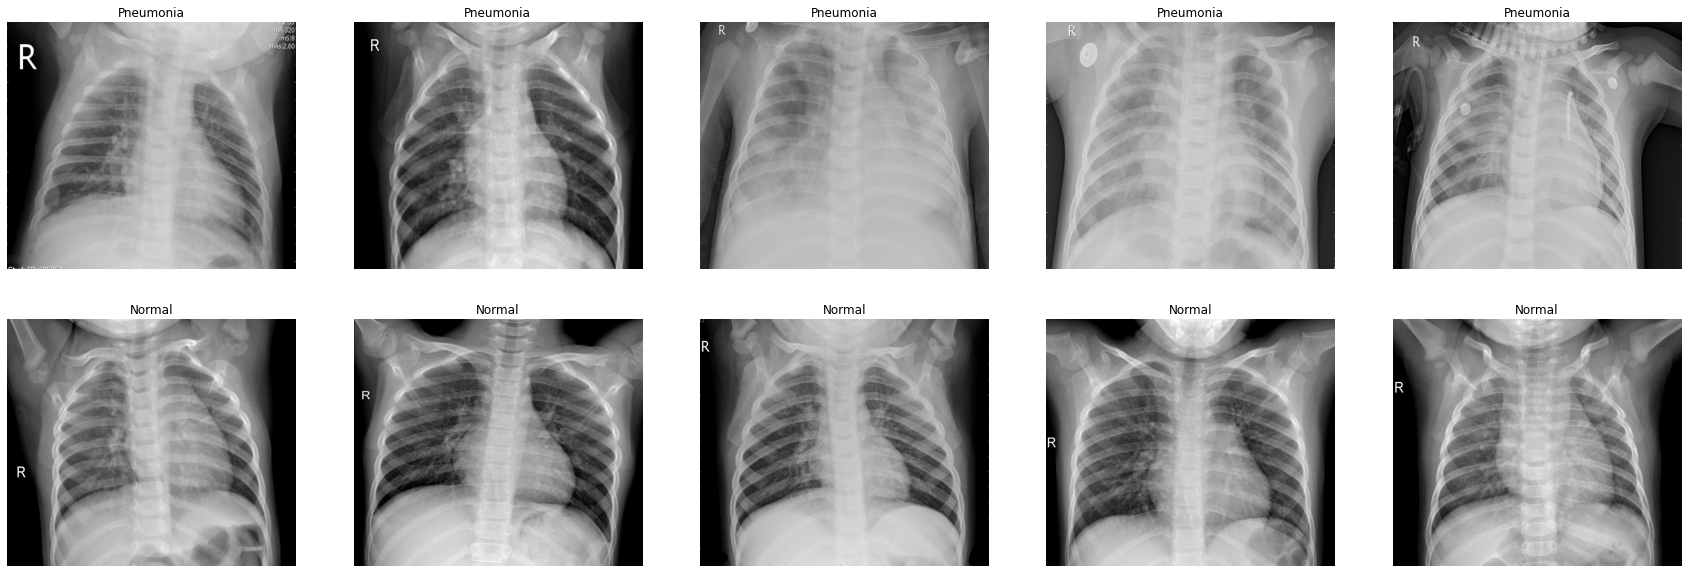

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [ ]:
train_normal = train_dir / 'NORMAL'
train_pnemonoia = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical


for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = to_categorical(0, num_classes=2)
    train_data.append(img)
    train_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = to_categorical(1, num_classes=2)
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (5216, 28, 28, 3)
Total number of labels: (5216, 2)


In [ ]:
train_data1.shape

(5216, 28, 28, 3)

In [ ]:
train_data1[1]

array([[[0.15294118, 0.15294118, 0.15294118],
        [0.30196078, 0.30196078, 0.30196078],
        [0.43529412, 0.43529412, 0.43529412],
        ...,
        [0.6       , 0.6       , 0.6       ],
        [0.33333333, 0.33333333, 0.33333333],
        [0.2       , 0.2       , 0.2       ]],

       [[0.14509804, 0.14509804, 0.14509804],
        [0.28627451, 0.28627451, 0.28627451],
        [0.43137255, 0.43137255, 0.43137255],
        ...,
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.31764706, 0.31764706, 0.31764706],
        [0.23137255, 0.23137255, 0.23137255]],

       [[0.12941176, 0.12941176, 0.12941176],
        [0.2627451 , 0.2627451 , 0.2627451 ],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        ...,
        [0.42352941, 0.42352941, 0.42352941],
        [0.3254902 , 0.3254902 , 0.3254902 ],
        [0.18823529, 0.18823529, 0.18823529]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.36470588, 0.36470588, 0.36470588],
        [0.56862745, 0

In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns=['no', 'label'],index=None)
y=train_labels1.drop('no',axis=1,inplace=True)

In [ ]:
train_labels1

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5211,1.0
5212,1.0
5213,1.0
5214,1.0


In [ ]:
normal_case_dir=val_dir /'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'
# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')
valid_data = []
valid_labels = []

normal_cases

<generator object Path.glob at 0x7fef9e3b29d0>

In [ ]:
valid_data = []
valid_labels = []
from keras.utils.np_utils import to_categorical


for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
valid_data1 = np.array(valid_data)
valid_labels1 = np.array(valid_labels)

print("Total number of validation examples: ", valid_data1.shape)
print("Total number of labels:", valid_labels1.shape)

Total number of validation examples:  (1349, 28, 28, 3)
Total number of labels: (1349, 2)


In [ ]:
len(valid_data1)

1349

In [ ]:
len(valid_labels1)

1349

In [ ]:
valid_labels1 = pd.DataFrame(valid_labels1, columns=['no', 'label'],index=None)
y=valid_labels1.drop('no',axis=1,inplace=True)
#valid_labels

In [ ]:
print(train_data1.shape)
print(train_labels1.shape)
print(valid_data1.shape)
print(valid_labels1.shape)

(5216, 28, 28, 3)
(5216, 1)
(1349, 28, 28, 3)
(1349, 1)


In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0.0    3875
1.0    3875
Name: label, dtype: int64


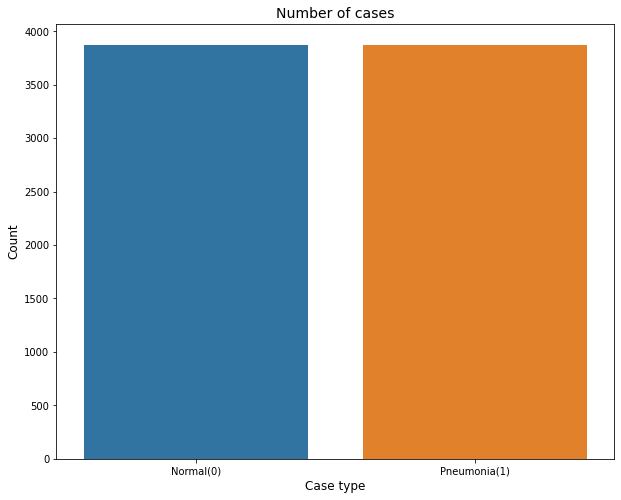

In [ ]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [ ]:
train_data2.shape

(7750, 2352)

In [ ]:
train_labels2.shape

(7750, 1)

In [ ]:
train_labels2['label'].value_counts()

0.0    3875
1.0    3875
Name: label, dtype: int64

In [ ]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [ ]:
#import imblearn
#from imblearn.over_sampling import RandomOverSampler
#oversample =  RandomOverSampler(random_state=42)
#train_data2, train_labels2 = oversample.fit_resample(train_data1, train_labels1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(train_data2), np.array(train_labels2), epochs=10, validation_data=(np.array(valid_data1), np.array(valid_labels1)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/10
243/243 [==============================] - 13s 45ms/step - loss: 0.3747 - accuracy: 0.8210 - val_loss: 0.2085 - val_accuracy: 0.9185
Epoch 2/10
243/243 [==============================] - 11s 45ms/step - loss: 0.2293 - accuracy: 0.9105 - val_loss: 0.1149 - val_accuracy: 0.9600
Epoch 3/10
243/243 [==============================] - 11s 46ms/step - loss: 0.1888 - accuracy: 0.9248 - val_loss: 0.0957 - val_accuracy: 0.9703
Epoch 4/10
243/243 [==============================] - 11s 44ms/step - loss: 0.1714 - accuracy: 0.9330 - val_loss: 0.0854 - val_accuracy: 0.9703
Epoch 5/10
243/243 [==============================] - 11s 44ms/step - loss: 0.1540 - accuracy: 0.9404 - val_loss: 0.1308 - val_accuracy: 0.9518
Epoch 6/10
243/243 [==============================] - 11s 44ms/step - loss: 0.1488 - accuracy: 0.9440 - val_loss: 0.1414 - val_accuracy: 0.9422
Epoch 7/10
243/243 [==============================] - 11s 44ms/step - loss: 0.1498 - accuracy: 0.9400 - val_loss: 0.4544 - val_accuracy:

In [ ]:
pic=[]
img = cv2.imread(str('/content/drive/MyDrive/Preumonia X-ray/archive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)
#pic_labels.append(pneu)

In [ ]:
pic1 = np.array(pic)

In [ ]:
a=model.predict(pic1)
a

array([[-4.029573 ,  2.0538857]], dtype=float32)

In [ ]:
a.argmax()

1

In [ ]:
#datagen = ImageDataGenerator()
#datagen.fit(train)
#X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
#model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)

In [ ]:
!mkdir -p saved_model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
new_model = tf.keras.models.load_model('model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
a=new_model.predict(pic1)
a

array([[-4.029573 ,  2.0538857]], dtype=float32)

In [ ]:
np.argmax(a)

1